# Cancer de esófago

Dataset de un estudio de cancer de esófago en Ile-et-Vilaine, France.

Columnas:
* agegp: grupo de edad
* alcgp: consumo de alcohol
* tobgp: consumo de tabaco
* ncases: número de casos de cancer
* ncontrol: población de control

¿Cual es la variable que más parece influir la aparición del cancer con mayor probabilidad?

In [4]:
dfcancer<-read.csv("resumen/ESOPH.dat",skip=43,sep = "")
head(dfcancer)

agegp,alcgp,tobgp,ncases,ncontrols
25-34,0-39g/day,0-9g/day,0,40
25-34,0-39g/day,10-19,0,10
25-34,0-39g/day,20-29,0,6
25-34,0-39g/day,30+,0,5
25-34,40-79,0-9g/day,0,27
25-34,40-79,10-19,0,7


In [5]:
dfcancer$ratio<-dfcancer$ncases/(dfcancer$ncontrols+dfcancer$ncases )

Podemos ver que variables son las más importantes a la hora de que cambiar el ratio de aparición de cancer:

In [10]:
summary(aov(data=dfcancer, ratio~agegp+alcgp+tobgp))

            Df Sum Sq Mean Sq F value   Pr(>F)    
agegp        5 1.2374 0.24748   19.50 1.92e-12 ***
alcgp        3 0.8462 0.28206   22.22 1.97e-10 ***
tobgp        3 0.0526 0.01752    1.38    0.255    
Residuals   76 0.9646 0.01269                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Si miramos una relación lineal podemos encontrar más detalles ocultos:

In [8]:
summary(lm(data=dfcancer, ratio~agegp+alcgp+tobgp))


Call:
lm(formula = ratio ~ agegp + alcgp + tobgp, data = dfcancer)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.29621 -0.06515  0.00698  0.06597  0.31965 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.12180    0.04076  -2.988  0.00378 ** 
agegp35-44   0.04415    0.04128   1.069  0.28827    
agegp45-54   0.20193    0.04054   4.980 3.87e-06 ***
agegp55-64   0.26956    0.04054   6.649 4.00e-09 ***
agegp65-74   0.27896    0.04128   6.758 2.50e-09 ***
agegp75+     0.31439    0.04510   6.971 9.97e-10 ***
alcgp120+    0.27536    0.03412   8.071 8.05e-12 ***
alcgp40-79   0.09185    0.03332   2.756  0.00732 ** 
alcgp80-119  0.14994    0.03408   4.399 3.49e-05 ***
tobgp10-19   0.02679    0.03252   0.824  0.41259    
tobgp20-29   0.01178    0.03447   0.342  0.73354    
tobgp30+     0.06648    0.03428   1.939  0.05620 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1127 on 76 degrees of freedom

In [11]:
unique(dfcancer$agegp)
ageVectors<-c(30,40,50,60,70,80)
dfcancer$age<-ageVectors[as.numeric(dfcancer$age)]

[1] 25-34 35-44 45-54 55-64 65-74 75+  
Levels: 25-34 35-44 45-54 55-64 65-74 75+

In [12]:
unique(dfcancer$alcgp)
alcVectors<-c(20,60,100,130)
dfcancer$alc<-alcVectors[as.numeric(dfcancer$alcgp)]

[1] 0-39g/day 40-79     80-119    120+     
Levels: 0-39g/day 120+ 40-79 80-119

In [13]:
unique(dfcancer$tobgp)
tobVectors<-c(5,15,25,35)
dfcancer$tob<-alcVectors[as.numeric(dfcancer$tobgp)]

[1] 0-9g/day 10-19    20-29    30+     
Levels: 0-9g/day 10-19 20-29 30+

Podemos intentar repetir el experimento buscando relaciones lineales:

In [14]:
summary(lm(data=dfcancer, ratio~age+alc+tob))


Call:
lm(formula = ratio ~ age + alc + tob, data = dfcancer)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.41638 -0.09253 -0.03781  0.08151  0.47264 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.2509386  0.0706451  -3.552  0.00063 ***
age          0.0067830  0.0009814   6.912 8.66e-10 ***
alc          0.0007997  0.0003866   2.068  0.04168 *  
tob          0.0004470  0.0003888   1.150  0.25355    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1507 on 84 degrees of freedom
Multiple R-squared:  0.3849,	Adjusted R-squared:  0.363 
F-statistic: 17.52 on 3 and 84 DF,  p-value: 6.351e-09


# Crimen

Este conjunto de datos brinda una variedad de variables según el estado de los EE. UU. En dos momentos con una diferencia de 10 años.
Las columnas que acaban en 10 contienen los datos de 10 años después.
Origen de datos [aquí](https://www.sheffield.ac.uk/mash/data).

In [16]:
crime<-read.csv("resumen/stcp-Rdataset-Crime.csv")
str(crime)

'data.frame':	47 obs. of  27 variables:
 $ CrimeRate          : num  45.5 52.3 56.6 60.3 64.2 67.6 70.5 73.2 75 78.1 ...
 $ Youth              : int  135 140 157 139 126 128 130 143 141 133 ...
 $ Southern           : int  0 0 1 1 0 0 0 0 0 0 ...
 $ Education          : num  12.4 10.9 11.2 11.9 12.2 13.5 14.1 12.9 12.9 11.4 ...
 $ ExpenditureYear0   : int  69 55 47 46 106 67 63 66 56 51 ...
 $ LabourForce        : int  540 535 512 480 599 624 641 537 523 599 ...
 $ Males              : int  965 1045 962 968 989 972 984 977 968 1024 ...
 $ MoreMales          : int  0 1 0 0 0 0 0 0 0 1 ...
 $ StateSize          : int  6 6 22 19 40 28 14 10 4 7 ...
 $ YouthUnemployment  : int  80 135 97 135 78 77 70 114 107 99 ...
 $ MatureUnemployment : int  22 40 34 53 25 25 21 35 37 27 ...
 $ HighYouthUnemploy  : int  1 1 0 0 1 1 1 1 0 1 ...
 $ Wage               : int  564 453 288 457 593 507 486 487 489 425 ...
 $ BelowWage          : int  139 200 276 249 171 206 196 166 170 225 ...
 $ CrimeRate10   

¿Tienen los estados del sur una mayor criminalidad?

In [18]:
shapiro.test(crime$CrimeRate[crime$Southern==1])$p.value
shapiro.test(crime$CrimeRate[crime$Southern==0])$p.value

t.test(crime$CrimeRate[crime$Southern==0],crime$CrimeRate[crime$Southern==1],alternative = "less")

[1] 0.66073

[1] 0.5698296


	Welch Two Sample t-test

data:  crime$CrimeRate[crime$Southern == 0] and crime$CrimeRate[crime$Southern == 1]
t = 0.40055, df = 40.428, p-value = 0.6546
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
     -Inf 16.78009
sample estimates:
mean of x mean of y 
 103.9065  100.6813 


Relación entre el crimen, el gasto policial y el número de personas por debajo del salario mínimo.

In [19]:
cor(crime[,c("CrimeRate","ExpenditureYear0","BelowWage")])
cor(crime[,c("CrimeRate10","ExpenditureYear10","BelowWage10")])

,CrimeRate,ExpenditureYear0,BelowWage
CrimeRate,1.0000000,0.6462106,-0.1673177
ExpenditureYear0,0.6462106,1.0000000,-0.6305003
BelowWage,-0.1673177,-0.6305003,1.0000000


,CrimeRate10,ExpenditureYear10,BelowWage10
CrimeRate10,1.00000000,0.6306089,-0.06596506
ExpenditureYear10,0.63060885,1.0000000,-0.55263959
BelowWage10,-0.06596506,-0.5526396,1.00000000


¿Puede el número de personas debajo del salario mínimo predecir el crimen?

In [20]:
summary(lm(data=crime,CrimeRate~BelowWage))


Call:
lm(formula = CrimeRate ~ BelowWage, data = crime)

Residuals:
    Min      1Q  Median      3Q     Max 
-63.973 -20.573   2.099  19.615  53.902 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 126.3162    21.0719   5.995 3.18e-07 ***
BelowWage    -0.1212     0.1064  -1.138    0.261    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 28.8 on 45 degrees of freedom
Multiple R-squared:  0.028,	Adjusted R-squared:  0.006395 
F-statistic: 1.296 on 1 and 45 DF,  p-value: 0.261


¿Qué variables pueden afectar más al crimen?

In [24]:
summary(lm(data=crime,CrimeRate~Males+Youth+LabourForce+YouthUnemployment+Wage))


Call:
lm(formula = CrimeRate ~ Males + Youth + LabourForce + YouthUnemployment + 
    Wage, data = crime)

Residuals:
    Min      1Q  Median      3Q     Max 
-61.051 -18.083  -4.313  19.298  61.407 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.785e+02  1.432e+02  -1.246 0.219908    
Males              3.857e-02  1.941e-01   0.199 0.843479    
Youth              9.408e-01  4.505e-01   2.088 0.043006 *  
LabourForce        8.533e-03  1.370e-01   0.062 0.950645    
YouthUnemployment -1.259e-03  2.895e-01  -0.004 0.996552    
Wage               2.062e-01  5.657e-02   3.645 0.000746 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26 on 41 degrees of freedom
Multiple R-squared:  0.2782,	Adjusted R-squared:  0.1902 
F-statistic: 3.161 on 5 and 41 DF,  p-value: 0.01667


¿Han aumentado los crímenes en los últimos 10 años?

In [25]:
shapiro.test(crime$CrimeRate)$p.value
shapiro.test(crime$CrimeRate10)$p.value
t.test(crime$CrimeRate,crime$CrimeRate10,paired = T, alternative = "less")

[1] 0.8507786

[1] 0.6736181


	Paired t-test

data:  crime$CrimeRate and crime$CrimeRate10
t = 0.47082, df = 46, p-value = 0.68
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
     -Inf 3.370597
sample estimates:
mean of the differences 
              0.7382979 


¿Es el gasto de policía más alto en el sur?

In [26]:
shapiro.test(crime$ExpenditureYear0[crime$Southern==1])$p.value
shapiro.test(crime$ExpenditureYear0[crime$Southern==0])$p.value
wilcox.test(crime$ExpenditureYear0[crime$Southern==0],
            crime$ExpenditureYear0[crime$Southern==1],alternative = "less")
mean(crime$ExpenditureYear0[crime$Southern==0])
mean(crime$ExpenditureYear0[crime$Southern==1])

[1] 0.01499506

[1] 0.05327059

Warning message in wilcox.test.default(crime$ExpenditureYear0[crime$Southern == :
“cannot compute exact p-value with ties”


	Wilcoxon rank sum test with continuity correction

data:  crime$ExpenditureYear0[crime$Southern == 0] and crime$ExpenditureYear0[crime$Southern == 1]
W = 368, p-value = 0.9966
alternative hypothesis: true location shift is less than 0


[1] 92.87097

[1] 69.75

# Churn rate

Vamos a utilizar un dataset publicado por IBM para [watson analytics](https://www.ibm.com/communities/analytics/watson-analytics-blog/predictive-insights-in-the-telco-customer-churn-data-set/).


En este ejemplo vamos a cargar el dataset proporcionado y ver si somos capaces de ver qué usuarios son los que corren más riesgo de irse.

El conjunto de datos incluye información sobre:

* Clientes que se fueron en el último mes: la columna se llama Churn
* Servicios para los que se ha registrado cada cliente: teléfono, líneas múltiples, Internet, seguridad en línea, copia de seguridad en línea, protección de dispositivos, soporte técnico y transmisión de TV y películas
* Información de la cuenta del cliente: cuánto tiempo han sido cliente (columna tenure), contrato, método de pago, facturación electrónica, cargos mensuales y cargos totales
* Información demográfica sobre los clientes: sexo, rango de edad y si tienen socios y dependientes


In [27]:
dfchurn<-read.csv("resumen/WA_Fn-UseC_-Telco-Customer-Churn.csv")
head(dfchurn)
str(dfchurn)

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,⋯,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,⋯,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,⋯,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,⋯,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,⋯,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


'data.frame':	7043 obs. of  21 variables:
 $ customerID      : Factor w/ 7043 levels "0002-ORFBO","0003-MKNFE",..: 5376 3963 2565 5536 6512 6552 1003 4771 5605 4535 ...
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 2 1 3 3 2 3 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 3 3 1 1 1 3 1 3 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 1 3 1 1 1 3 1 1 3 ...
 $ DeviceProtection: Factor w/ 3 levels "No","

Vemos que la mayor parte de las columnas son factores. Llama la atención la columna SeniorCitizen que parece numérica, veamos que valores tiene:

In [28]:
unique(dfchurn$SeniorCitizen)
table(dfchurn$SeniorCitizen)

[1] 0 1


   0    1 
5901 1142 

Esta columna debería ser un factor, mirando otra parte de la documentación vemos que:

 1 = Si es senior citizen
 
 0 = No es senior citizen

In [29]:
dfchurn$SeniorCitizen<-factor(dfchurn$SeniorCitizen,labels = c("No","Yes"))

Eliminamso la columna customerID porque no nos hace falta

In [30]:
dfchurn$customerID<-NULL

## Comprobamos con la Edad

¿Son las personas mayores más o menos propensas a dejar la compañía?

In [34]:
tseniorchurn<-table(dfchurn[,c("SeniorCitizen","Churn")])
tseniorchurn

             Churn
SeniorCitizen   No  Yes
          No  4508 1393
          Yes  666  476

Calculamos probabilidades condicionales.

Si nos fijamos únicamente en los ciudadanos senior, ¿cual es la probabilidad de que dejen la compañía?

$P(Churn=1 \mid Senior=1)=\frac{475}{666+475}=0.42$

Si nos fijamos únicamente en los ciudadanos jóvenes, ¿cual es la probabilidad de que dejen la compañía?

$P(Churn=1 \mid Senior=0)=\frac{666}{4508+1393}=0.23$

In [35]:
tseniorchurnm<-prop.table(tseniorchurn,margin = 1)
tseniorchurnm

paste("La probabilidad de que un Senior Citizen deje la compañía es:",tseniorchurnm[2,2])
paste("La probabilidad de que un Cliente joven deje la compañía es:",tseniorchurnm[1,2])

             Churn
SeniorCitizen        No       Yes
          No  0.7639383 0.2360617
          Yes 0.5831874 0.4168126

[1] "La probabilidad de que un Senior Citizen deje la compañía es: 0.416812609457093"

[1] "La probabilidad de que un Cliente joven deje la compañía es: 0.236061684460261"

¿Es esta diferencia en la matriz de conteos estadísticamente significativa para decir que la probabilidad de que un ciudadano mayor abandone la compañia es más alta? Sí, porque su p-valor es muy bajo.

In [36]:
chisq.test(tseniorchurn)


	Pearson's Chi-squared test with Yates' continuity correction

data:  tseniorchurn
X-squared = 159.43, df = 1, p-value < 2.2e-16


Podemos pintarlo con barras de error:

In [37]:
print("Probabilidad de permanencia de un ciudadano joven:")
btyoung<-binom.test(tseniorchurn[1,])
btyoung$estimate
btyoung$conf.int


print("Probabilidad de permanencia de un ciudadano senior:")
btsenior<-binom.test(tseniorchurn[2,])
btsenior$estimate
btsenior$conf.int

[1] "Probabilidad de permanencia de un ciudadano joven:"


probability of success 
             0.7639383

[1] 0.7528897 0.7747254
attr(,"conf.level")
[1] 0.95

[1] "Probabilidad de permanencia de un ciudadano senior:"


probability of success 
             0.5831874

[1] 0.5539707 0.6119744
attr(,"conf.level")
[1] 0.95

group,rate,lth,uth
Senior,0.5831874,0.5539707,0.6119744
Young,0.7639383,0.7528897,0.7747254


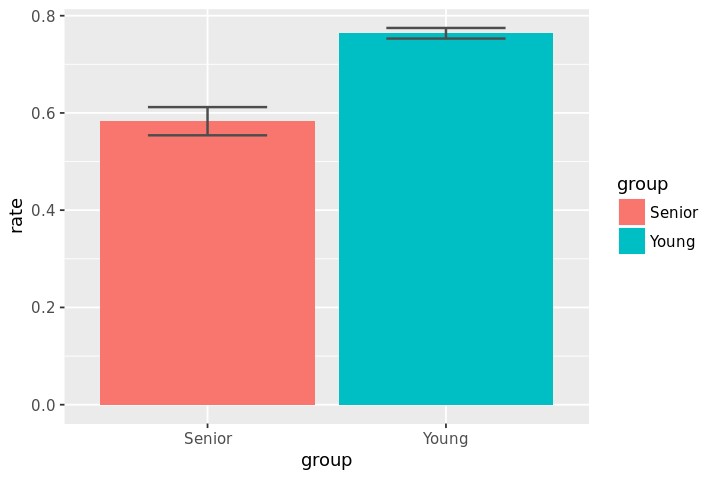

In [38]:
df<-data.frame(group=c("Senior","Young"),rate=c(btsenior$estimate,btyoung$estimate),
            lth=c(btsenior$conf.int[1],btyoung$conf.int[1]),
            uth=c(btsenior$conf.int[2],btyoung$conf.int[2]))
df
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)
ggplot(data=df,aes(x=group,y=rate))+
    geom_col(aes(fill=group))+
    geom_errorbar(aes(ymin = lth, ymax = uth), width = 0.5, size = 0.7, color = "gray30")



## Comprobamos con tenure

Vamos a ver si el tiempo que lleva en servicio implica algo

In [40]:
print("Comprobamos los estadísticos más importantes para la columna tenure:")
summary(dfchurn$tenure)
paste("Media:",mean(dfchurn$tenure))
paste("Desviación std:",sd(dfchurn$tenure))

print("Comprobamos los estadísticos más importantes para la columna tenure condicionado a que Churn=NO:")
summary(dfchurn$tenure[dfchurn$Churn=="No"])
paste("Media:",mean(dfchurn$tenure[dfchurn$Churn=="No"]))
paste("Desviación std:",sd(dfchurn$tenure[dfchurn$Churn=="No"]))

print("Comprobamos los estadísticos más importantes para la columna tenure condicionado a que Churn=YES:")
summary(dfchurn$tenure[dfchurn$Churn=="Yes"])
paste("Media:",mean(dfchurn$tenure[dfchurn$Churn=="Yes"]))
paste("Desviación std:",sd(dfchurn$tenure[dfchurn$Churn=="Yes"]))


[1] "Comprobamos los estadísticos más importantes para la columna tenure:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    9.00   29.00   32.37   55.00   72.00 

[1] "Media: 32.3711486582422"

[1] "Desviación std: 24.5594810230945"

[1] "Comprobamos los estadísticos más importantes para la columna tenure condicionado a que Churn=NO:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   15.00   38.00   37.57   61.00   72.00 

[1] "Media: 37.5699652106687"

[1] "Desviación std: 24.1137766907041"

[1] "Comprobamos los estadísticos más importantes para la columna tenure condicionado a que Churn=YES:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    2.00   10.00   17.98   29.00   72.00 

[1] "Media: 17.9791332263242"

[1] "Desviación std: 19.5311230545196"

Sin hacer ninguna suposición sobre la distribucíon que sigue podemos utilizar la desigualdad de Chebyshev.

Vamos a ver el margen de error del 50%

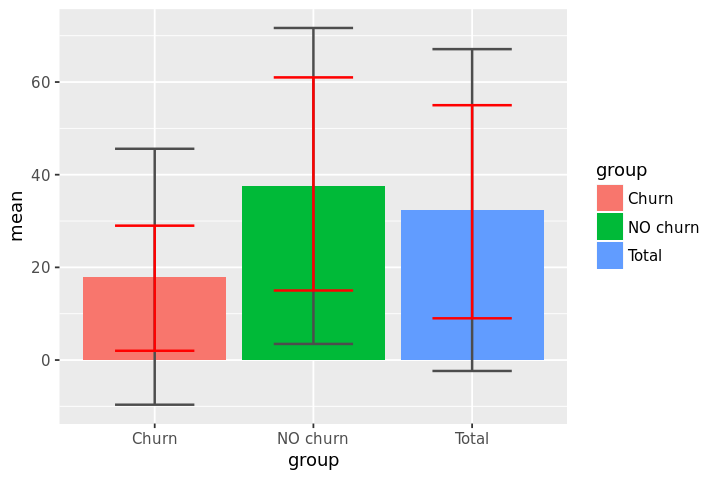

In [41]:
p<-0.5

k<-1/sqrt(p)

meansTenure<-c(mean(dfchurn$tenure),mean(dfchurn$tenure[dfchurn$Churn=="No"]),mean(dfchurn$tenure[dfchurn$Churn=="Yes"]))
sdTenure<-c(sd(dfchurn$tenure),sd(dfchurn$tenure[dfchurn$Churn=="No"]),sd(dfchurn$tenure[dfchurn$Churn=="Yes"]))
lth<-meansTenure-k*sdTenure
uth<-meansTenure+k*sdTenure
q1<-c(quantile(dfchurn$tenure,0.25),quantile(dfchurn$tenure[dfchurn$Churn=="No"],0.25),quantile(dfchurn$tenure[dfchurn$Churn=="Yes"],0.25))
q3<-c(quantile(dfchurn$tenure,0.75),quantile(dfchurn$tenure[dfchurn$Churn=="No"],0.75),quantile(dfchurn$tenure[dfchurn$Churn=="Yes"],0.75))

df<-data.frame(group=c("Total","NO churn","Churn"),mean=meansTenure,lth,uth,q1,q3)

options(repr.plot.height=4,repr.plot.width=6)
ggplot(data=df,aes(x=group,y=mean))+
    geom_col(aes(fill=group))+
    geom_errorbar(aes(ymin = lth, ymax = uth), width = 0.5, size = 0.7, color = "gray30")+
    geom_errorbar(aes(ymin = q1, ymax = q3), width = 0.5, size = 0.7, color = "red")


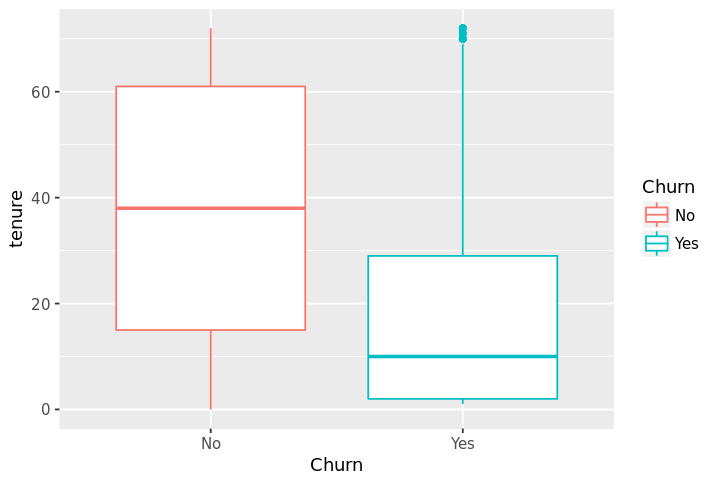

In [42]:
ggplot(data=dfchurn,aes(x=Churn,y=tenure,color=Churn))+geom_boxplot()

Vamos a tratar de ver que distribución tiene la columna tenure:

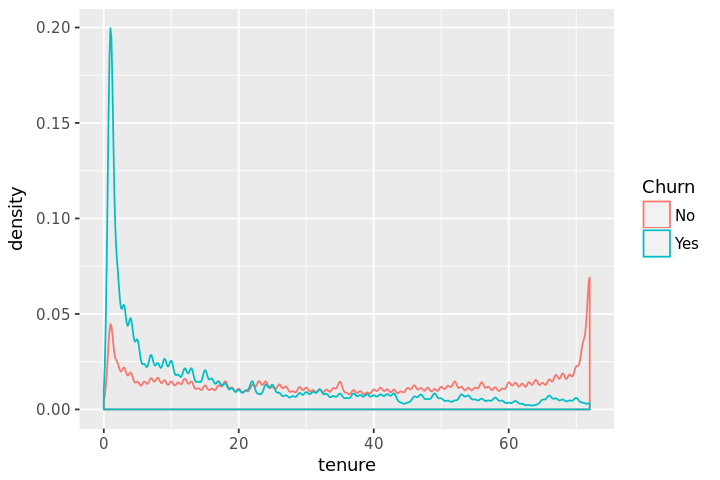

In [43]:
ggplot(data=dfchurn,aes(x=tenure,color=Churn))+geom_density(bw=0.4)

¿son realmente distintas estas dos funciones de distribución?

In [44]:
wilcox.test(data=dfchurn,tenure ~ Churn)


	Wilcoxon rank sum test with continuity correction

data:  tenure by Churn
W = 7154700, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [45]:
ks.test(dfchurn$tenure[dfchurn$Churn=="No"],dfchurn$tenure[dfchurn$Churn=="Yes"])

Warning message in ks.test(dfchurn$tenure[dfchurn$Churn == "No"], dfchurn$tenure[dfchurn$Churn == :
“p-value will be approximate in the presence of ties”


	Two-sample Kolmogorov-Smirnov test

data:  dfchurn$tenure[dfchurn$Churn == "No"] and dfchurn$tenure[dfchurn$Churn == "Yes"]
D = 0.35736, p-value < 2.2e-16
alternative hypothesis: two-sided


In [46]:
histNoChurn <- hist(dfchurn$tenure[dfchurn$Churn=="No"],breaks=14, right=FALSE,plot = FALSE)
histYesChurn<- hist(dfchurn$tenure[dfchurn$Churn=="Yes"],breaks=histNoChurn$breaks, right=FALSE,plot = FALSE)

rbind(NoChurn=histNoChurn$counts,Churn=histYesChurn$counts)

NoChurn,558,373,341,302,305,281,258,251,253,277,301,290,347,409,628
Churn,680,243,176,134,98,78,77,67,62,56,53,46,27,49,23


In [47]:
chisq.test(rbind(NoChurn=histNoChurn$counts,Churn=histYesChurn$counts))


	Pearson's Chi-squared test

data:  rbind(NoChurn = histNoChurn$counts, Churn = histYesChurn$counts)
X-squared = 979.42, df = 14, p-value < 2.2e-16


¿Cómo influye el tenure en el ratio de churn?

Vamos a calcular una regresión lineal del churn en función del tenure

In [48]:
breaks<-seq(0,max(dfchurn$tenure),length.out = 10)

tenure<-rep(NA,length(breaks)-1)
churnratio<-rep(NA,length(breaks)-1)
lchurnratio<-rep(NA,length(breaks)-1)
uchurnratio<-rep(NA,length(breaks)-1)
for (i in 2:length(breaks)){
    tenure[i-1]<-mean(breaks[(i-1):i])
    idx<-which(dfchurn$tenure<breaks[i] & dfchurn$tenure>=breaks[i-1])
    btchurn<-binom.test(table(dfchurn$Churn[idx]))    
    churnratio[i-1]<-1-btchurn$estimate
    lchurnratio[i-1]<-1-btchurn$conf.int[1]
    uchurnratio[i-1]<-1-btchurn$conf.int[2]
}

dfchurntenure<-data.frame(tenure,churnratio,lchurnratio,uchurnratio)
dfchurntenure

tenure,churnratio,lchurnratio,uchurnratio
4,0.51799007,0.5426410,0.49327355
12,0.35081585,0.3838006,0.31886002
20,0.26625387,0.3021303,0.23252941
28,0.22542373,0.2613191,0.19230398
36,0.21705426,0.2551635,0.18222282
44,0.18146718,0.2174095,0.14920914
52,0.15693431,0.1901386,0.12748542
60,0.10600707,0.1343411,0.08187396
68,0.08464329,0.1057332,0.06657596


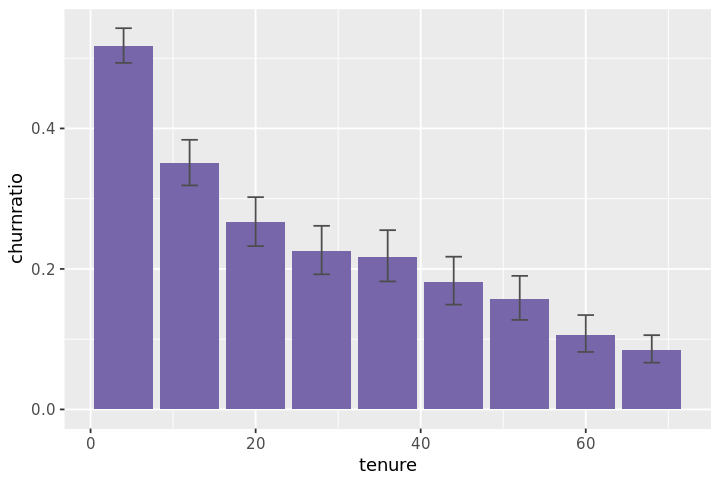

In [49]:
ggplot(data=dfchurntenure,aes(x=tenure,y=churnratio))+geom_col(fill="#7766AA")+
    geom_errorbar(aes(ymin = lchurnratio, ymax= uchurnratio), width = 2,  color = "gray30")

In [50]:
model<-lm(data=dfchurntenure,churnratio~tenure+I(tenure^2)+I(tenure^3))
summary(model)


Call:
lm(formula = churnratio ~ tenure + I(tenure^2) + I(tenure^3), 
    data = dfchurntenure)

Residuals:
        1         2         3         4         5         6         7         8 
 0.011203 -0.015542 -0.009854  0.002197  0.022150  0.003137 -0.003760 -0.023179 
        9 
 0.013648 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.998e-01  2.653e-02  22.607 3.15e-06 ***
tenure      -2.536e-02  3.234e-03  -7.842 0.000541 ***
I(tenure^2)  5.421e-04  1.045e-04   5.186 0.003506 ** 
I(tenure^3) -4.170e-06  9.558e-07  -4.363 0.007272 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01848 on 5 degrees of freedom
Multiple R-squared:  0.9881,	Adjusted R-squared:  0.9809 
F-statistic:   138 on 3 and 5 DF,  p-value: 3.154e-05


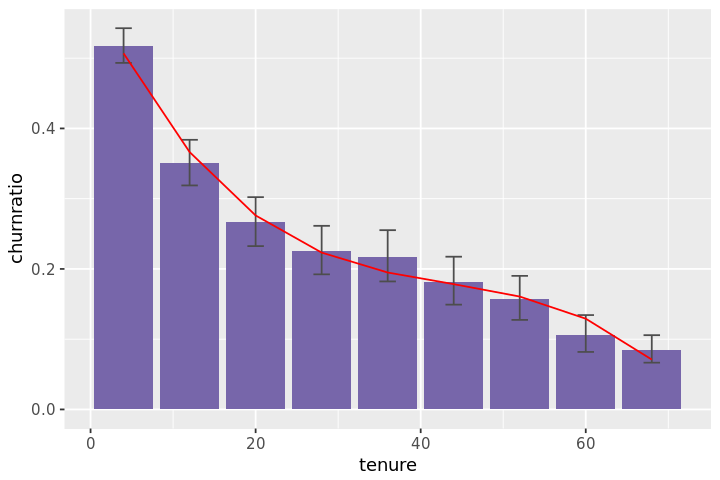

In [51]:
dfchurntenure$predict<-predict(model,dfchurntenure)
ggplot(data=dfchurntenure,aes(x=tenure,y=churnratio))+geom_col(fill="#7766AA")+
    geom_errorbar(aes(ymin = lchurnratio, ymax= uchurnratio), width = 2, color = "gray30")+
    geom_line(aes(y=predict),color="red")

# Senior y Tenure

¿Cómo influye el tenure/senior en el ratio de churn?

Vamos a calcular una regresión lineal del churn en función del tenure para el caso de senior citizen y el de usuario joven.

In [52]:
getChurnTenure<-function(dfchurn,breaks){

    tenure<-rep(NA,length(breaks)-1)
    churnratio<-rep(NA,length(breaks)-1)
    lchurnratio<-rep(NA,length(breaks)-1)
    uchurnratio<-rep(NA,length(breaks)-1)

    for (i in 2:length(breaks)){
        tenure[i-1]<-mean(breaks[(i-1):i])
        idx<-which(dfchurn$tenure<breaks[i] & dfchurn$tenure>=breaks[i-1])
        btchurn<-binom.test(table(dfchurn$Churn[idx]))    
        churnratio[i-1]<-1-btchurn$estimate
        lchurnratio[i-1]<-1-btchurn$conf.int[1]
        uchurnratio[i-1]<-1-btchurn$conf.int[2]

    }

    dfchurntenure<-data.frame(tenure,churnratio,lchurnratio,uchurnratio)
    dfchurntenure
}
breaks<-seq(0,max(dfchurn$tenure),length.out = 10)
dfchurntenureSenior<-getChurnTenure(dfchurn[dfchurn$SeniorCitizen=="Yes",],breaks)
dfchurntenureSenior$Senior<-"Yes"

dfchurntenureYoung<-getChurnTenure(dfchurn[dfchurn$SeniorCitizen=="No",],breaks)
dfchurntenureYoung$Senior<-"No"

dfchurntenureAge<-rbind(dfchurntenureSenior,dfchurntenureYoung)
dfchurntenureAge

tenure,churnratio,lchurnratio,uchurnratio,Senior
4,0.70416667,0.76114739,0.64206216,Yes
12,0.60317460,0.68919845,0.51218497,Yes
20,0.43396226,0.53373609,0.33797384,Yes
28,0.45794393,0.55703246,0.36124252,Yes
36,0.38541667,0.49028137,0.28782303,Yes
44,0.43678161,0.54735222,0.33063897,Yes
52,0.26373626,0.36654917,0.17685483,Yes
60,0.17045455,0.26550900,0.09865978,Yes
68,0.13793103,0.20495645,0.08633226,Yes
4,0.48542274,0.51224015,0.45866788,No


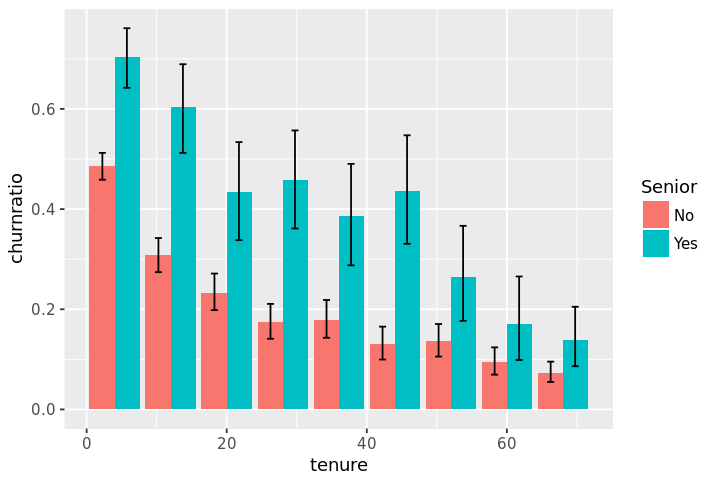

In [53]:
ggplot(data=dfchurntenureAge,aes(x=tenure,y=churnratio,fill=Senior))+geom_col(position = "dodge")+
    geom_errorbar(aes(ymin = lchurnratio, ymax= uchurnratio), width = 2,position=position_dodge(width=7))

In [54]:
model<-lm(data=dfchurntenureAge,churnratio~(tenure+I(tenure^2)+I(tenure^3))*Senior)
summary(model)


Call:
lm(formula = churnratio ~ (tenure + I(tenure^2) + I(tenure^3)) * 
    Senior, data = dfchurntenureAge)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.061961 -0.015121  0.002285  0.016805  0.083257 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            5.739e-01  6.155e-02   9.324 3.01e-06 ***
tenure                -2.695e-02  7.502e-03  -3.593  0.00491 ** 
I(tenure^2)            5.781e-04  2.425e-04   2.384  0.03835 *  
I(tenure^3)           -4.293e-06  2.217e-06  -1.936  0.08158 .  
SeniorYes              2.068e-01  8.704e-02   2.376  0.03886 *  
tenure:SeniorYes       5.326e-03  1.061e-02   0.502  0.62651    
I(tenure^2):SeniorYes -1.268e-04  3.429e-04  -0.370  0.71936    
I(tenure^3):SeniorYes  1.916e-07  3.136e-06   0.061  0.95249    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04286 on 10 degrees of freedom
Multiple R-squared:  0.9687,	Adjusted R-squared:  

In [55]:
model$coefficients

(Intercept)                tenure           I(tenure^2) 
         5.739111e-01         -2.695377e-02          5.780909e-04 
          I(tenure^3)             SeniorYes      tenure:SeniorYes 
        -4.293227e-06          2.068427e-01          5.326271e-03 
I(tenure^2):SeniorYes I(tenure^3):SeniorYes 
        -1.267599e-04          1.915661e-07

In [56]:
modelYoung<-lm(data=dfchurntenureAge[dfchurntenureAge$Senior=="No",],churnratio~(tenure+I(tenure^2)+I(tenure^3)))
modelSenior<-lm(data=dfchurntenureAge[dfchurntenureAge$Senior=="Yes",],churnratio~(tenure+I(tenure^2)+I(tenure^3)))
print("Los coeficientes del modelo completo que se usan cuando Senior=Yes son valores relativos al Senior=No")
print("Para obtener el real, hay que sumarle los coeficientes con Senior=No")

model$coefficients[grepl("SeniorYes",names(model$coefficients))]+modelYoung$coefficients

modelSenior$coefficients

[1] "Los coeficientes del modelo completo que se usan cuando Senior=Yes son valores relativos al Senior=No"
[1] "Para obtener el real, hay que sumarle los coeficientes con Senior=No"


SeniorYes      tenure:SeniorYes I(tenure^2):SeniorYes 
         7.807539e-01         -2.162750e-02          4.513310e-04 
I(tenure^3):SeniorYes 
        -4.101660e-06

(Intercept)        tenure   I(tenure^2)   I(tenure^3) 
 7.807539e-01 -2.162750e-02  4.513310e-04 -4.101660e-06

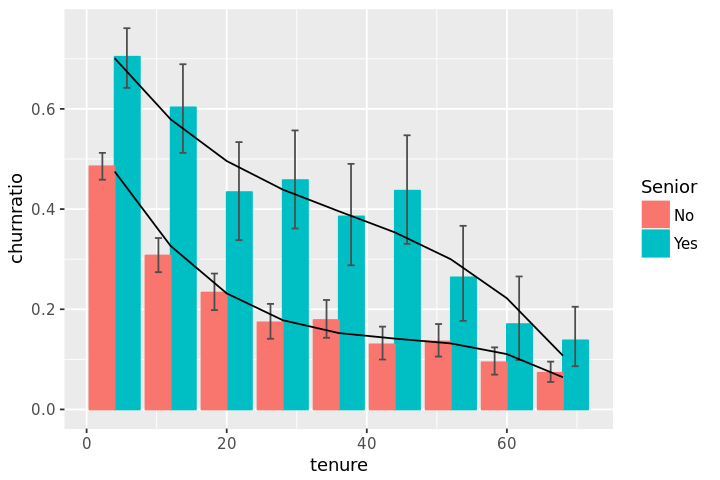

In [57]:
dfchurntenureAge$predict<-predict(model,dfchurntenureAge)
ggplot(data=dfchurntenureAge,aes(x=tenure,y=churnratio,color=Senior,fill=Senior))+geom_col(position = "dodge")+
    geom_errorbar(aes(ymin = lchurnratio, ymax= uchurnratio),color="gray30", width = 2,position=position_dodge(width=7))+
    geom_line(aes(y=predict),color="black")

# Cargos en cuenta y Churn


Empezamos con la matriz de correlación para ver como están relacionadas las siguientes columnas:
* Tenure
* MonthlyCharges
* TotalCharges

In [58]:
cor(dfchurn[,c("MonthlyCharges","TotalCharges","tenure")],use = "complete.obs")

,MonthlyCharges,TotalCharges,tenure
MonthlyCharges,1.0000000,0.6510648,0.2468618
TotalCharges,0.6510648,1.0000000,0.8258805
tenure,0.2468618,0.8258805,1.0000000


Podemos sacar las siguientes conclusiones:
* Los clientes que pagan tienen tarifas mensuales más altas, muestran una ligera correlación con los que llevan más tiempo.
* Los clientes que llevan más tiempo, evidentemente han pagado más en todal.
* Los clientes que pagan más al mes, acaban pagando más en total.

# Diferentes variables  categóricas

In [59]:
plotRatios<-function(col,dfchurn){
    tblchurn<-table(dfchurn[,c(col,"Churn")])
    bttests<-apply(tblchurn,1,function(x) binom.test(x))
    probs<-1-sapply(bttests,function(x) x$estimate)
    lth<-1-sapply(bttests,function(x) x$conf.int[1])
    uth<-1-sapply(bttests,function(x) x$conf.int[2])

    df<-data.frame(group=names(bttests),rate=probs,lth,uth)

    ggplot(data=df,aes(x=group,y=rate))+
        geom_col(aes(fill=group))+
        geom_errorbar(aes(ymin = lth, ymax = uth), width = 0.5, size = 0.7, color = "gray30")+
        xlab(col)+ylab("Churn rate")
}


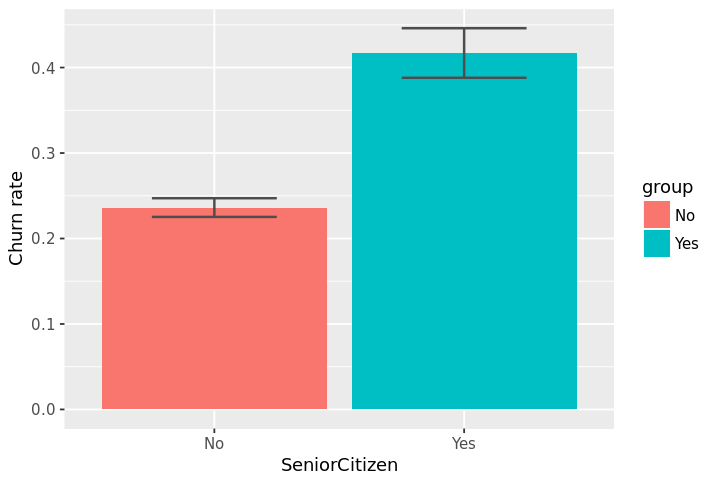

In [60]:
plotRatios("SeniorCitizen",dfchurn)


	Pearson's Chi-squared test

data:  table(dfchurn[, c(col, "Churn")])
X-squared = 732.31, df = 2, p-value < 2.2e-16


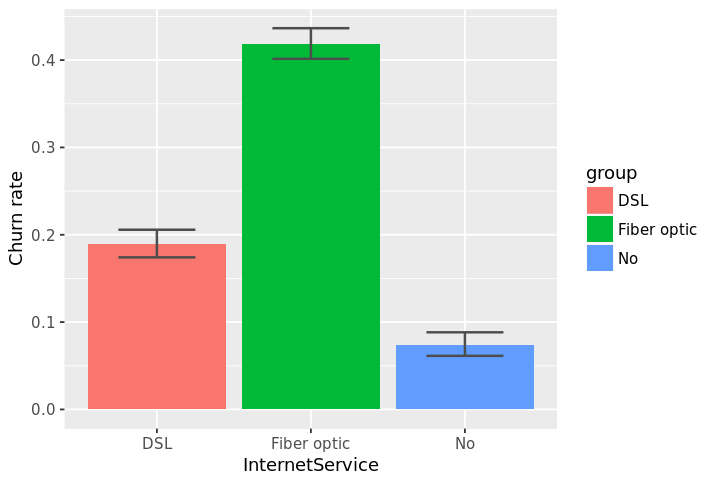

In [61]:
col<-"InternetService"
plotRatios(col,dfchurn)
chisq.test(table(dfchurn[,c(col,"Churn")]))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(dfchurn[, c(col, "Churn")])
X-squared = 0.91503, df = 1, p-value = 0.3388


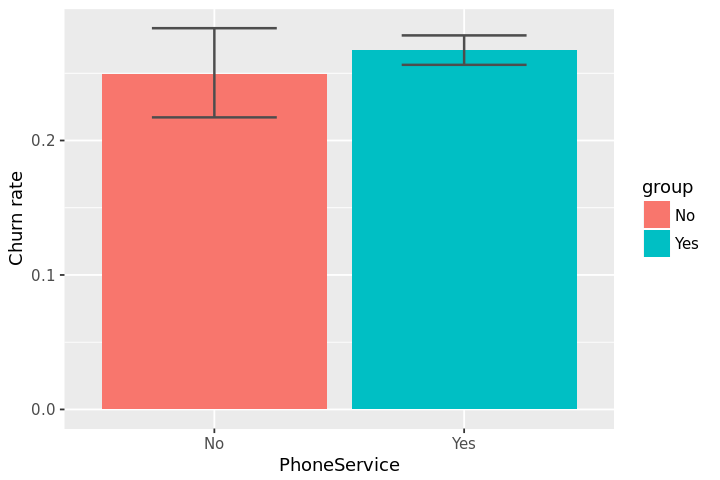

In [62]:
col<-"PhoneService"
plotRatios(col,dfchurn)
chisq.test(table(dfchurn[,c(col,"Churn")]))


	Pearson's Chi-squared test

data:  table(dfchurn[, c(col, "Churn")])
X-squared = 601.81, df = 2, p-value < 2.2e-16


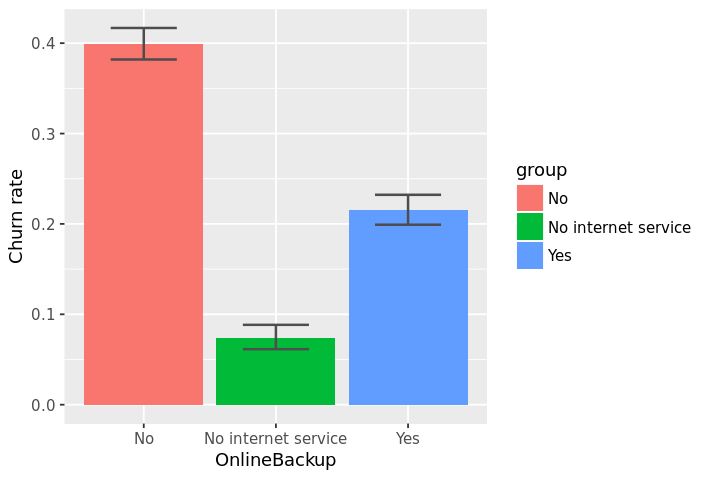

In [63]:
col<-"OnlineBackup"
plotRatios(col,dfchurn)
chisq.test(table(dfchurn[,c(col,"Churn")]))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(dfchurn[, c(col, "Churn")])
X-squared = 0.48408, df = 1, p-value = 0.4866


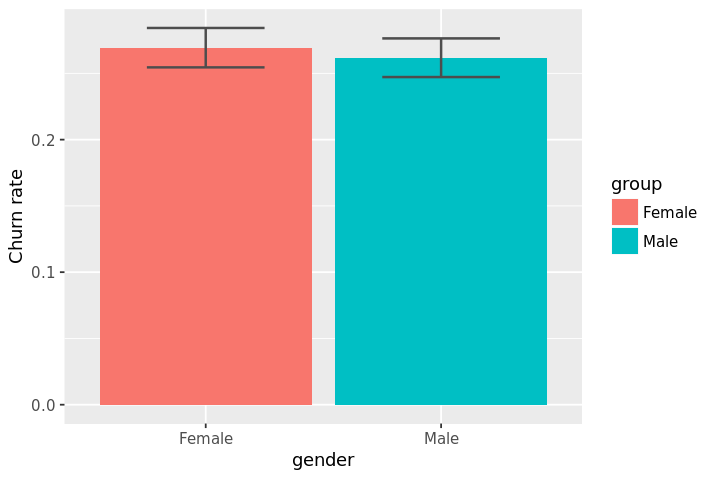

In [64]:
col<-"gender"
plotRatios(col,dfchurn)
chisq.test(table(dfchurn[,c(col,"Churn")]))

### ¿Cómo afectan el cojunto de variables?

Primero comprobamos como afecta el hecho de tener un Senior Citizen:

In [65]:
modelglm<-glm(data=dfchurn,Churn~SeniorCitizen, family=binomial())

cf<-(coef(modelglm))
paste("Los coeficientes son:")
cf

[1] "Los coeficientes son:"

(Intercept) SeniorCitizenYes 
      -1.1743939        0.8385221

In [66]:
tseniorchurn<-prop.table(table(dfchurn[,c("SeniorCitizen","Churn")]),margin = 1)
tseniorchurn

paste("La probabilidad de que un usuario joven deje la compañía es:",tseniorchurn[1,2])
paste("La probabilidad dada por el modelo es: ",exp(cf[1])/(1+exp(cf[1])))


paste("La probabilidad de que un Senior Citizen deje la compañía es:",tseniorchurn[2,2])
paste("La probabilidad dada por el modelo es:",exp(cf[1]+cf[2])/(1+exp(cf[1]+cf[2])))

             Churn
SeniorCitizen        No       Yes
          No  0.7639383 0.2360617
          Yes 0.5831874 0.4168126

[1] "La probabilidad de que un usuario joven deje la compañía es: 0.236061684460261"

[1] "La probabilidad dada por el modelo es:  0.236061684460672"

[1] "La probabilidad de que un Senior Citizen deje la compañía es: 0.416812609457093"

[1] "La probabilidad dada por el modelo es: 0.416812609457078"

Comprobamos si existe una relación lineal entre 3 factores

In [67]:
modelglm<-glm(data=dfchurn,Churn~gender+PhoneService+SeniorCitizen, family=binomial())

summary(modelglm)
anova(modelglm,test="Chi")


Call:
glm(formula = Churn ~ gender + PhoneService + SeniorCitizen, 
    family = binomial(), data = dfchurn)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0493  -0.7427  -0.7304   1.3112   1.7420  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.23158    0.09471 -13.004   <2e-16 ***
genderMale       -0.03820    0.05461  -0.700    0.484    
PhoneServiceYes   0.08450    0.09396   0.899    0.368    
SeniorCitizenYes  0.83802    0.06740  12.433   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 8150.1  on 7042  degrees of freedom
Residual deviance: 7999.8  on 7039  degrees of freedom
AIC: 8007.8

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,7042,8150.146,NA
gender,1,0.5223499,7041,8149.624,4.698410e-01
PhoneService,1,1.0071756,7040,8148.616,3.155804e-01
SeniorCitizen,1,148.7794971,7039,7999.837,3.204348e-34


Comprobamos si existe una multiplicativa

In [68]:
modelglm<-glm(data=dfchurn,Churn~gender*PhoneService*SeniorCitizen, family=binomial())

summary(modelglm)
anova(modelglm,test="Chi")


Call:
glm(formula = Churn ~ gender * PhoneService * SeniorCitizen, 
    family = binomial(), data = dfchurn)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1213  -0.7461  -0.7287   1.3195   1.7768  

Coefficients:
                                            Estimate Std. Error z value
(Intercept)                                  -1.3474     0.1461  -9.221
genderMale                                    0.1360     0.2018   0.674
PhoneServiceYes                               0.2110     0.1530   1.379
SeniorCitizenYes                              1.2139     0.3326   3.649
genderMale:PhoneServiceYes                   -0.1901     0.2118  -0.897
genderMale:SeniorCitizenYes                  -0.4505     0.4486  -1.004
PhoneServiceYes:SeniorCitizenYes             -0.4054     0.3472  -1.168
genderMale:PhoneServiceYes:SeniorCitizenYes   0.4834     0.4704   1.028
                                            Pr(>|z|)    
(Intercept)                                  < 2e-16 ***

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,7042,8150.146,NA
gender,1,5.223499e-01,7041,8149.624,4.698410e-01
PhoneService,1,1.007176e+00,7040,8148.616,3.155804e-01
SeniorCitizen,1,1.487795e+02,7039,7999.837,3.204348e-34
gender:PhoneService,1,2.649554e-01,7038,7999.572,6.067360e-01
gender:SeniorCitizen,1,3.488031e-03,7037,7999.568,9.529047e-01
PhoneService:SeniorCitizen,1,3.594635e-01,7036,7999.209,5.488044e-01
gender:PhoneService:SeniorCitizen,1,1.057100e+00,7035,7998.152,3.038774e-01


Añadimos al modelo el factor OnlineBackup

In [69]:
modelglm<-glm(data=dfchurn,Churn~gender+PhoneService+SeniorCitizen+OnlineBackup, family=binomial())

summary(modelglm)
anova(modelglm,test="Chi")


Call:
glm(formula = Churn ~ gender + PhoneService + SeniorCitizen + 
    OnlineBackup, family = binomial(), data = dfchurn)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2446  -0.8651  -0.6598   1.1116   2.3016  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     -0.85434    0.09786  -8.730  < 2e-16 ***
genderMale                      -0.04403    0.05693  -0.773    0.439    
PhoneServiceYes                  0.38693    0.09583   4.038  5.4e-05 ***
SeniorCitizenYes                 0.62409    0.07041   8.863  < 2e-16 ***
OnlineBackupNo internet service -2.06378    0.10583 -19.501  < 2e-16 ***
OnlineBackupYes                 -0.90266    0.06216 -14.521  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 8150.1  on 7042  degrees of freedom
Residual deviance: 7393.1  on 7037  degrees of freedom

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,7042,8150.146,NA
gender,1,0.5223499,7041,8149.624,4.698410e-01
PhoneService,1,1.0071756,7040,8148.616,3.155804e-01
SeniorCitizen,1,148.7794971,7039,7999.837,3.204348e-34
OnlineBackup,2,606.7644192,7037,7393.072,1.748962e-132


Al añadir **OnlineBackup** hemos visto como **PhoneService** se volvía relevante. Vamos a buscar la relación que existe entre estas dos variables.


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(mydf[, c(col, "Churn")])
X-squared = 2.4788, df = 1, p-value = 0.1154


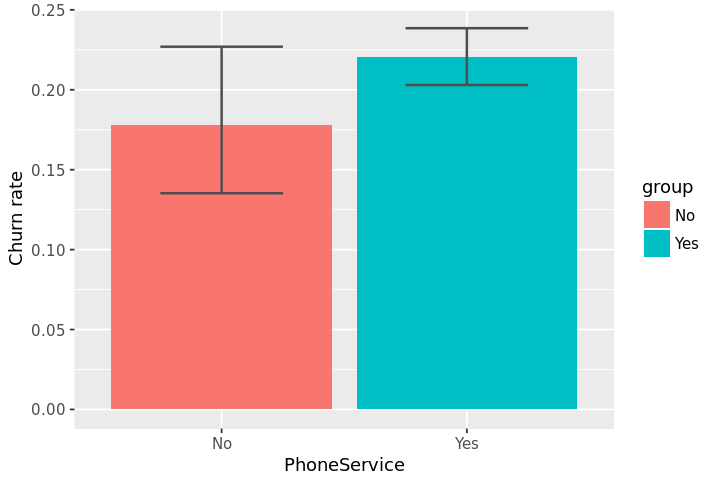


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(mydf[, c(col, "Churn")])
X-squared = 17.678, df = 1, p-value = 2.616e-05


Warning message:
“Removed 1 rows containing missing values (position_stack).”

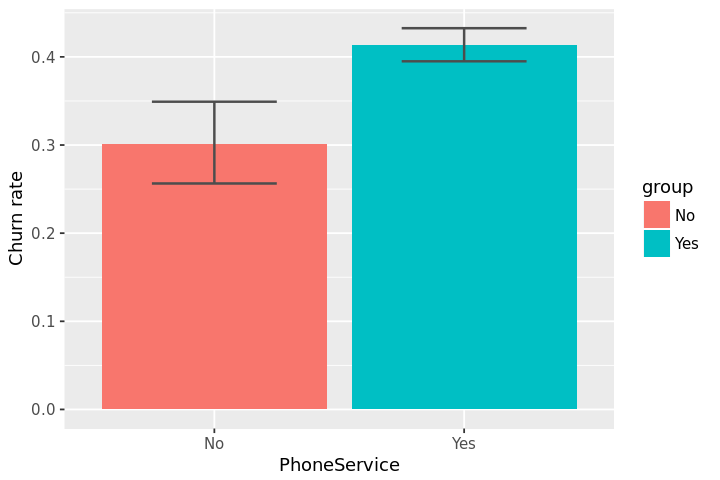

Warning message in chisq.test(table(mydf[, c(col, "Churn")])):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  table(mydf[, c(col, "Churn")])
X-squared = NaN, df = 1, p-value = NA


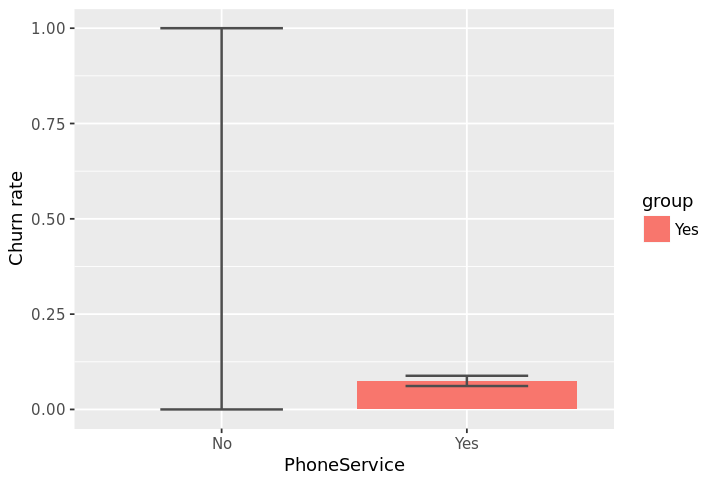

In [70]:
col<-"PhoneService"
mydf<-dfchurn[dfchurn$OnlineBackup=="Yes",]
plotRatios(col,mydf)
chisq.test(table(mydf[,c(col,"Churn")]))

mydf<-dfchurn[dfchurn$OnlineBackup=="No",]
plotRatios(col,mydf)
chisq.test(table(mydf[,c(col,"Churn")]))


mydf<-dfchurn[dfchurn$OnlineBackup=="No internet service",]
plotRatios(col,mydf)
chisq.test(table(mydf[,c(col,"Churn")]))


In [71]:
modelglm<-glm(data=dfchurn,Churn~PhoneService*OnlineBackup, family=binomial())

summary(modelglm)
anova(modelglm,test="Chi")


Call:
glm(formula = Churn ~ PhoneService * OnlineBackup, family = binomial(), 
    data = dfchurn)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0333  -0.8467  -0.7056   1.3287   2.2817  

Coefficients: (1 not defined because of singularities)
                                                Estimate Std. Error z value
(Intercept)                                      -0.8413     0.1097  -7.671
PhoneServiceYes                                   0.4924     0.1164   4.229
OnlineBackupNo internet service                  -2.1772     0.1053 -20.676
OnlineBackupYes                                  -0.6907     0.1894  -3.647
PhoneServiceYes:OnlineBackupNo internet service       NA         NA      NA
PhoneServiceYes:OnlineBackupYes                  -0.2240     0.2003  -1.119
                                                Pr(>|z|)    
(Intercept)                                     1.70e-14 ***
PhoneServiceYes                                 2.34e-05 ***
OnlineBackupNo 

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,7042,8150.146,NA
PhoneService,1,1.016439,7041,8149.129,3.133653e-01
OnlineBackup,2,678.410731,7039,7470.719,4.841519e-148
PhoneService:OnlineBackup,1,1.232571,7038,7469.486,2.669077e-01


Vemos que **PhoneService** cuando **OnlineBackup es "YES"** no se ve afectado. Lo que coincide con el primer dibujo de barras que habíamos pintado.

#### Modelos de regresión logistica

Antes vimos de otra forma como cambiaba el ratio de Churn con una regresión lineal. Aquí utilizamos una regresión logística para llegar a la misma conclusión.

In [73]:
modelglm<-glm(data=dfchurn,Churn~tenure, family=binomial())
summary(modelglm)
anova(modelglm,test="Chi")


Call:
glm(formula = Churn ~ tenure, family = binomial(), data = dfchurn)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1890  -0.8386  -0.4796   1.1823   2.3770  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.027313   0.042220   0.647    0.518    
tenure      -0.038767   0.001405 -27.589   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 8150.1  on 7042  degrees of freedom
Residual deviance: 7191.9  on 7041  degrees of freedom
AIC: 7195.9

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,7042,8150.146,NA
tenure,1,958.2778,7041,7191.868,2.105579e-210


In [74]:
modelglm<-glm(data=dfchurn,Churn~MonthlyCharges*SeniorCitizen, family=binomial())

summary(modelglm)
anova(modelglm,test="Chi")


Call:
glm(formula = Churn ~ MonthlyCharges * SeniorCitizen, family = binomial(), 
    data = dfchurn)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0799  -0.8380  -0.6349   1.3029   2.0209  

Coefficients:
                                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     -2.196841   0.080961 -27.134  < 2e-16 ***
MonthlyCharges                   0.015589   0.001079  14.452  < 2e-16 ***
SeniorCitizenYes                 1.642664   0.227281   7.227 4.92e-13 ***
MonthlyCharges:SeniorCitizenYes -0.012858   0.002763  -4.655 3.25e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 8150.1  on 7042  degrees of freedom
Residual deviance: 7777.9  on 7039  degrees of freedom
AIC: 7785.9

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,7042,8150.146,NA
MonthlyCharges,1,271.92408,7041,7878.222,4.320848e-61
SeniorCitizen,1,79.14604,7040,7799.076,5.768438e-19
MonthlyCharges:SeniorCitizen,1,21.15379,7039,7777.922,4.238631e-06


In [75]:
tbl<-anova(modelglm,test="Chi")
tbl[tbl$Pr<0.025,]
rownames(tbl)

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NA,NA,NA,NA,NA,NA
MonthlyCharges,1,271.92408,7041,7878.222,4.320848e-61
SeniorCitizen,1,79.14604,7040,7799.076,5.768438e-19
MonthlyCharges:SeniorCitizen,1,21.15379,7039,7777.922,4.238631e-06


[1] "NULL"                         "MonthlyCharges"              
[3] "SeniorCitizen"                "MonthlyCharges:SeniorCitizen"